**Skills Used :ML,NLTK,Pandas,**

**Problem Statement**

In this, we have to predict the number of positive and negative reviews based on sentiments by using different classification models.

**Importing Libraries and Dataset**

In [1]:
import pandas as pd
import numpy as np

In [3]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
#style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [5]:
df=pd.read_csv('/content/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
df.shape

(50000, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Plotting graph to see dataset is balanced or not

Text(0.5, 1.0, 'Sentiment Distribution')

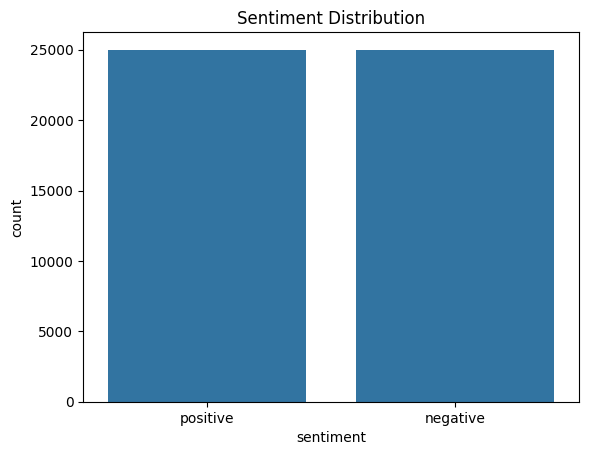

In [8]:
sns.countplot(x='sentiment',data=df)
plt.title('Sentiment Distribution')

Dataset is balanced

Making changes in sentiment column for positive sentiment :1
                                      negative sentiment :0

In [9]:
df.sentiment.replace("positive", 1, inplace=True)
df.sentiment.replace("negative", 0, inplace=True)

In [10]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


**Removing html strips,noisy text,square brackets**

In [11]:
#removing html strips
def strip_html(text):
    soup = BeautifulSoup(text,'html.parser')
    return soup.get_text()

In [12]:
#removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]','',text)

In [13]:
#removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

In [15]:
# Using apply function applying on review column
from bs4 import BeautifulSoup
df['review']=df['review'].apply(denoise_text)

<ipython-input-11-f95d78253f7a>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text,'html.parser')


In [17]:
#def function for removing special characters
def remove_special_characters(text,remove_digits=True):
    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(pattern,'',text)
    return text

In [18]:
# Apply function on review column
df['review'] = df['review'].apply(remove_special_characters)

In [19]:
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  419


In [20]:
df = df.drop_duplicates('review')

In [21]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [22]:
df.review = df['review'].apply(lambda x: stemming(x))

<ipython-input-22-72bea7568bda>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.review = df['review'].apply(lambda x: stemming(x))


In [23]:
pos_reviews =  df[df.sentiment == 1]
pos_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production The filming tech...,1
2,I thought this was a wonderful way to spend ti...,1
4,Petter Matteis Love in the Time of Money is a ...,1
5,Probably my alltime favorite movie a story of ...,1


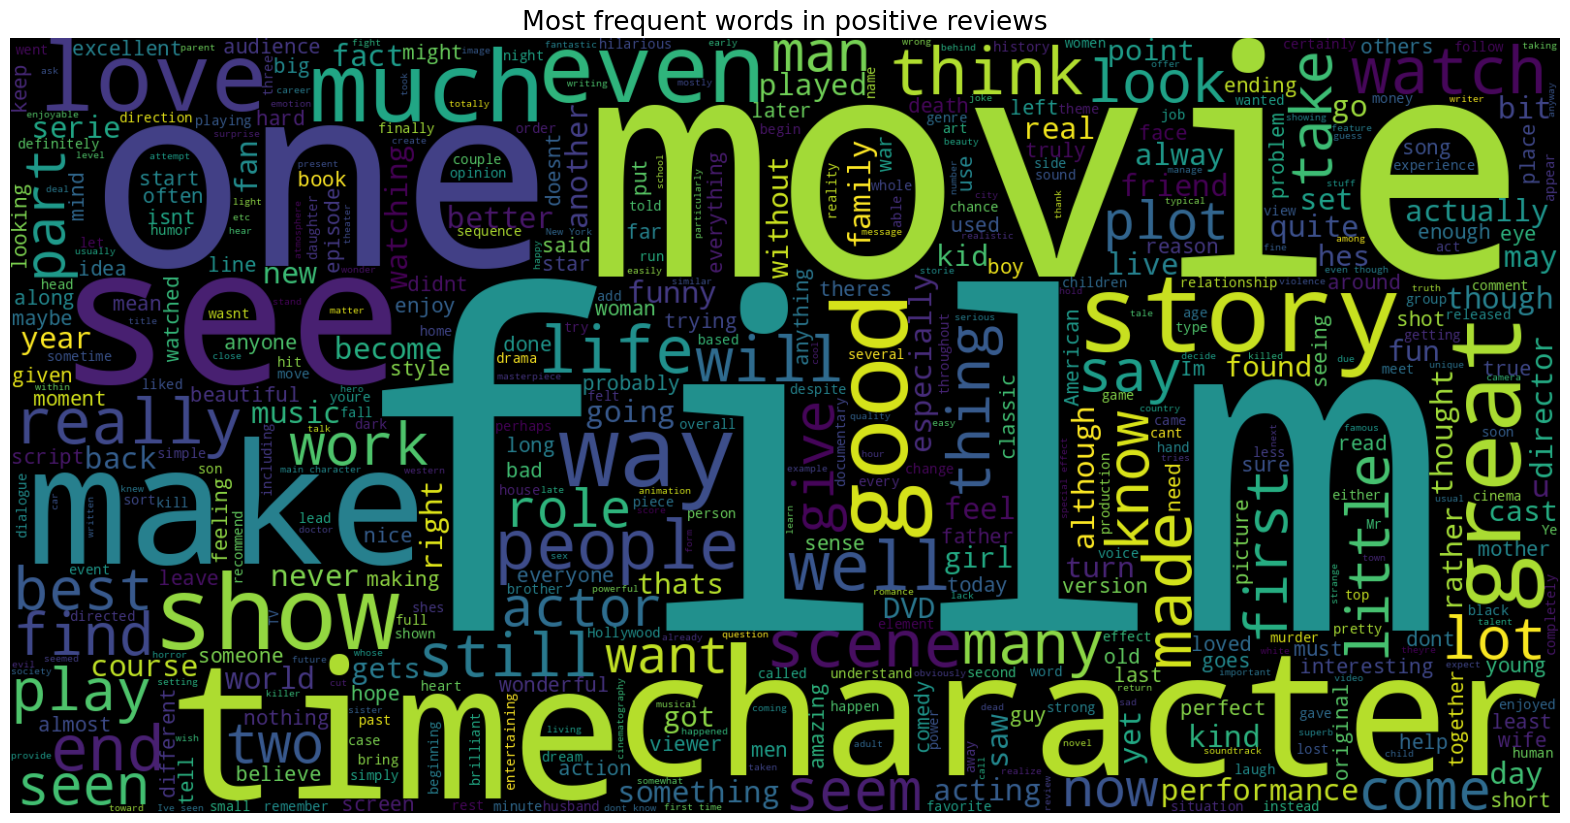

In [24]:
text = ' '.join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [25]:
from collections import Counter
count = Counter()
for text in pos_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('the', 292627),
 ('and', 167734),
 ('a', 156001),
 ('of', 149255),
 ('to', 128715),
 ('is', 110132),
 ('in', 91588),
 ('that', 64490),
 ('I', 63687),
 ('it', 63322),
 ('this', 53613),
 ('as', 47172),
 ('with', 44012),
 ('was', 42700),
 ('for', 41705)]

In [26]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', 'count']
pos_words.head()

,word,count
0,the,292627
1,and,167734
2,a,156001
3,of,149255
4,to,128715


In [27]:
px.bar(pos_words, x='count', y='word', title='Common words in positive reviews', color = 'word')

In [28]:
neg_reviews =  df[df.sentiment == 0]
neg_reviews.head()

,review,sentiment
3,Basically theres a family where a little boy J...,0
7,This show was an amazing fresh innovative ide...,0
8,Encouraged by the positive comments about this...,0
10,Phil the Alien is one of those quirky films wh...,0
11,I saw this movie when I was about 12 when it c...,0


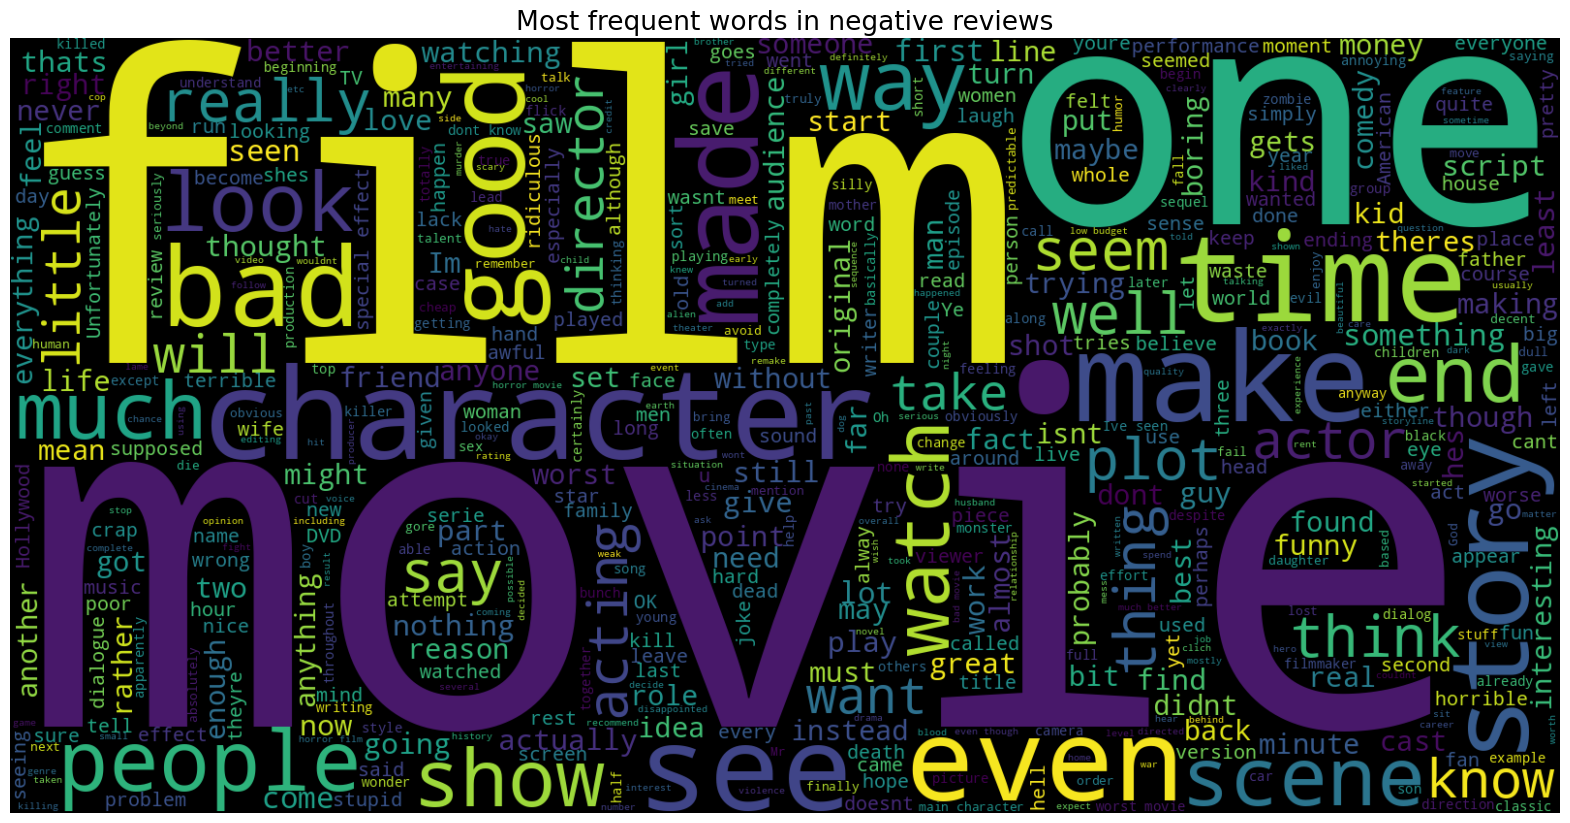

In [29]:
text = ' '.join([word for word in neg_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews', fontsize = 19)
plt.show()

In [30]:
count = Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)


[('the', 275066),
 ('a', 150254),
 ('and', 136689),
 ('of', 133616),
 ('to', 132703),
 ('is', 96535),
 ('in', 79914),
 ('I', 71354),
 ('that', 66762),
 ('this', 65118),
 ('it', 64538),
 ('was', 51061),
 ('movie', 46307),
 ('for', 40068),
 ('with', 39807)]

In [31]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word', 'count']
neg_words.head()

,word,count
0,the,275066
1,a,150254
2,and,136689
3,of,133616
4,to,132703


In [32]:
px.bar(neg_words, x='count', y='word', title='Common words in negative reviews', color = 'word')

**Splitting the dataset**

In [33]:
X = df['review']
Y = df['sentiment']

In [34]:
vect = TfidfVectorizer()
X = vect.fit_transform(df['review'])

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [36]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (34706, 221700)
Size of y_train:  (34706,)
Size of x_test:  (14875, 221700)
Size of y_test:  (14875,)


**Modellin**g

In [38]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

**Model -1 Logistic Regression**

In [39]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 89.21%


**Print the Confusion Matrix**

In [40]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[6570  862]
 [ 743 6700]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7432
           1       0.89      0.90      0.89      7443

    accuracy                           0.89     14875
   macro avg       0.89      0.89      0.89     14875
weighted avg       0.89      0.89      0.89     14875



**Model-2 Multinomial Naive Bayes**

In [41]:
from sklearn.naive_bayes import MultinomialNB

In [42]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
mnb_pred = mnb.predict(x_test)
mnb_acc = accuracy_score(mnb_pred, y_test)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))

Test accuracy: 86.18%


**Print the Confusion Matrix**

In [43]:
print(confusion_matrix(y_test, mnb_pred))
print("\n")
print(classification_report(y_test, mnb_pred))

[[6521  911]
 [1144 6299]]


              precision    recall  f1-score   support

           0       0.85      0.88      0.86      7432
           1       0.87      0.85      0.86      7443

    accuracy                           0.86     14875
   macro avg       0.86      0.86      0.86     14875
weighted avg       0.86      0.86      0.86     14875



**Model-3 Linear support Vecto**r

In [44]:
from sklearn.svm import LinearSVC

In [45]:
svc = LinearSVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 89.54%


**Print the Confusion Matri**x

In [46]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[6609  823]
 [ 733 6710]]


              precision    recall  f1-score   support

           0       0.90      0.89      0.89      7432
           1       0.89      0.90      0.90      7443

    accuracy                           0.90     14875
   macro avg       0.90      0.90      0.90     14875
weighted avg       0.90      0.90      0.90     14875



**Model-4 Decision Tre**e

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dct = DecisionTreeClassifier()
dct.fit(x_train, y_train)
dct_pred = svc.predict(x_test)
dct_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(dct_acc*100))

Test accuracy: 89.54%


**Print the confusoin Matrix**

In [49]:
print(confusion_matrix(y_test, dct_pred))
print("\n")
print(classification_report(y_test, dct_pred))

[[6609  823]
 [ 733 6710]]


              precision    recall  f1-score   support

           0       0.90      0.89      0.89      7432
           1       0.89      0.90      0.90      7443

    accuracy                           0.90     14875
   macro avg       0.90      0.90      0.90     14875
weighted avg       0.90      0.90      0.90     14875

